<h1> SNS데이터를 이용하여 형태소 분석 + Wordcloud + 빈도수 분석 그래프 + 비슷한 문서
    
    1. konlpy를 이용하여 SNS데이터를 분석한 후 
    2. Counter를 이용하여서 wordcloud와 그래프를 그리고
    3. 연관성이 있다고 생각되는 Content번호 찾기

In [188]:
import os,numpy as np, pandas as pd
import matplotlib.pyplot as plt, matplotlib as mpl
from sklearn.decomposition import PCA
from pylab import rcParams
import pandas as pd
import numpy as np
from konlpy.tag import Okt
import re
import json
import re
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import pytagcloud
import webbrowser

In [423]:
### 형태소로 본문 내용을 나눈 후에 '미세먼지' 등장 횟수를 표기
# 첫번째 데이터 불러오기
data = pd.read_csv('C:/Users/32141318/빅콘테스트/SNS데이터/블로그/블로그/SNS2 블로그만.csv', encoding='utf-8')

SNS데이터는 기본적으로 데이터 량이 많기 때문에 나누어줄 필요가 있음

미세먼지가 data_low는 미세먼지가 낮은 달
data_high는 미세먼지가 높은 달을 6개월 씩 나누어줌

In [428]:
data_low = data.copy()
data_low2 = data_low.loc[data_low['month'].values == '10']
data_low2 = data_low2.append(data_low.loc[data_low['month'].values == '09'])
data_low2 = data_low2.append(data_low.loc[data_low['month'].values == '08'])
data_low2 = data_low2.append(data_low.loc[data_low['month'].values == '07'])
data_low2 = data_low2.append(data_low.loc[data_low['month'].values == '06'])
data_low2 = data_low2.append(data_low.loc[data_low['month'].values == '05'])

In [439]:
data_high = data.copy()
data_high2 = data_high.loc[data_high['month'].values == '04']
data_high2 = data_high2.append(data_high.loc[data_high['month'].values == '01'])
data_high2 = data_high2.append(data_high.loc[data_high['month'].values == '02'])
data_high2 = data_high2.append(data_high.loc[data_high['month'].values == '03'])
data_high2 = data_high2.append(data_high.loc[data_high['month'].values == '11'])
data_high2 = data_high2.append(data_high.loc[data_high['month'].values == '12'])

In [425]:
# 필요없는 열 제거 (본문으로만 등장횟수를 지정할 것임)
data.drop(['DOCID', 'SECTION'], axis=1, inplace=True)

In [426]:
#DATE를 Datetime으로 바꾸기
data['DATE']=pd.to_datetime(data['DATE'])

In [427]:
data['month'] = data['DATE'].dt.strftime('%m')

In [430]:
#CONTENT에 결측값 제거하기
data_low2=data_low2.dropna(axis=0)
data_high2=data_high2.dropna(axis=0)

In [431]:
data_high2 = data_high2.reset_index()
data_low2= data_low2.reset_index()

In [440]:
data_high2 = data_high2.head(5000)

,DATE,TITLE,CONTENT,month


Okt를 사용하여서 형태소 분석 진행

In [434]:
#스트링 변수 strr을 만들어 데이터에서 CONTENT만 추출하여 스트링 변수로 만들어줌
strr_high2 = ""
nlp = Okt()
str_list = []
for i in range(len(data_high2)):
    #strr = ""
    strr_high2 += data_high2.iloc[:,3][i]
    
    #nouns = nlp.nouns(strr)
    #count = Counter(nouns)
    #str_list.append(count)

In [435]:
#만든 strr변수를 okt 사용해서 형태소 분석
nlp = Okt()
nouns_high2 = nlp.nouns(strr_high2)
#print nouns

#그 이후 Counter 사용해서 개수 count
count_high2 = Counter(nouns_high2)
print(count_high2)

Counter()


Counter를 사용하여 나온 각 형태소의 개수를 그래프로 표현

1415261
46792
[('미세먼지', 11124), ('수', 10565), ('것', 10473), ('보기', 6027), ('피부', 5877), ('때', 5809), ('더', 5805), ('곳', 5502), ('사용', 5468), ('기능', 5412)]


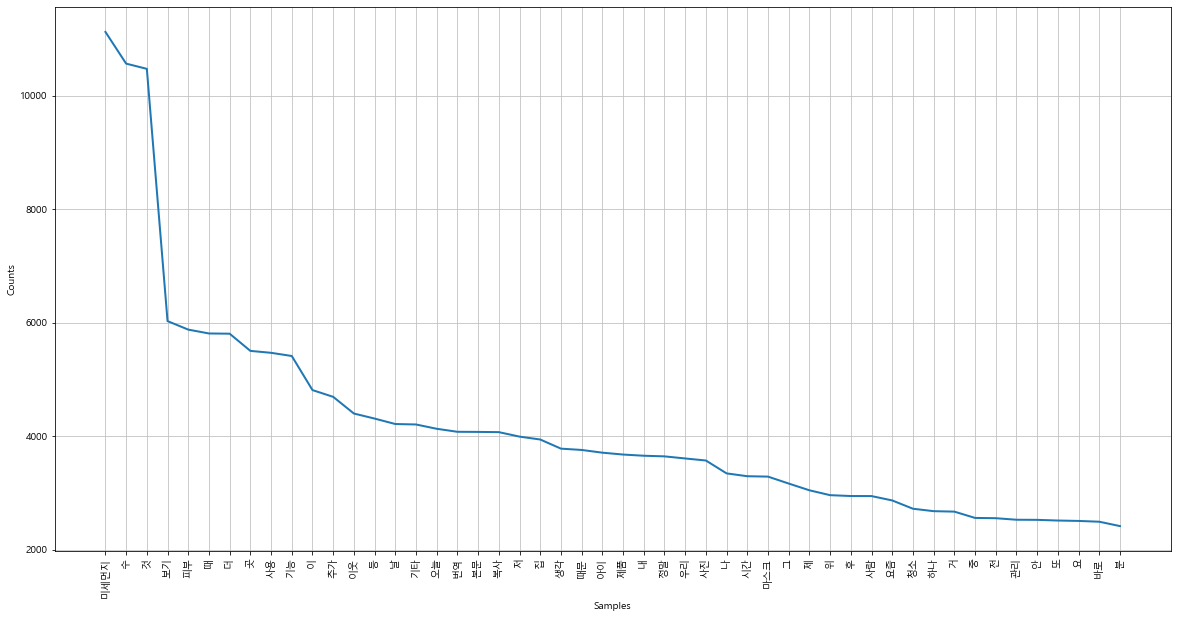

In [320]:
#import nltk

#plt.figure(figsize=(12,6))
#words = nltk.Text(nouns_high, name='단어 빈도수')
#words.plot(30) # 50개만
#plt.show()


import nltk
text = nltk.Text(nouns_high, name='NMSC')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
print(text.vocab().most_common(10))


import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

63268
9456
[('수', 536), ('미세먼지', 381), ('것', 378), ('사용', 254), ('때', 254), ('보기', 240), ('이', 237), ('등', 225), ('더', 213), ('기능', 204)]


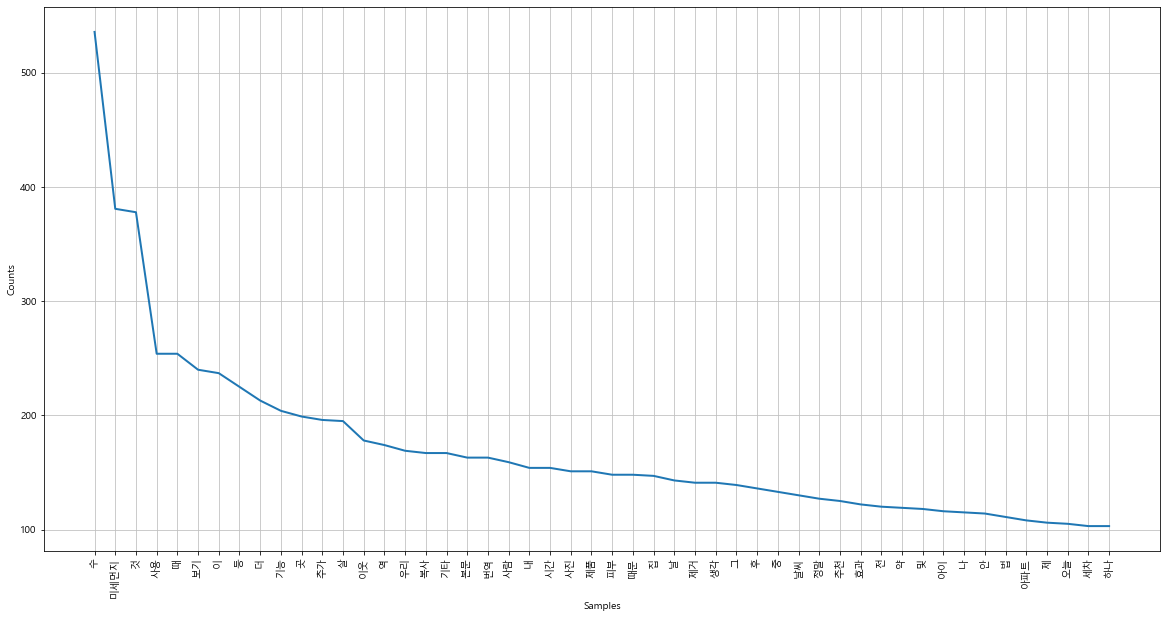

In [321]:
#import nltk

#plt.figure(figsize=(12,6))
#words = nltk.Text(nouns_high, name='단어 빈도수')
#words.plot(30) # 50개만
#plt.show()


import nltk
text = nltk.Text(nouns_low2, name='NMSC')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
print(text.vocab().most_common(10))


import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [248]:
#count = Counter(nouns)
#high만 계속 추가 앞으로
tag_count_high = []
tags_high = []

In [419]:
for n, c in count_high.most_common(1000):
    dics = {'tag': n, 'count': c}
    if len(dics['tag']) >= 2 and len(tags_high) <= 49:
        tag_count_high.append(dics)
        tags_high.append(dics['tag'])

In [420]:
for tag_high in tag_count_high:
    print(" {:<14}".format(tag_high['tag']), end='\t')
    print("{}".format(tag_high['count']))

 미세먼지          	10236
 보기            	5699
 피부            	5511
 사용            	5020
 기능            	4349
 추가            	4064
 이웃            	3818
 기타            	3683
 본문            	3597
 번역            	3592
 복사            	3591
 오늘            	3434
 사진            	3417
 우리            	3339
 제품            	3088
 정말            	3022
 생각            	2922
 아이            	2842
 때문            	2836
 미세먼지          	11124
 보기            	6027
 피부            	5877
 사용            	5468
 기능            	5412
 미세먼지          	11124
 보기            	6027
 피부            	5877
 사용            	5468
 기능            	5412
 추가            	4692
 이웃            	4398
 기타            	4205
 오늘            	4129
 번역            	4076
 본문            	4074
 복사            	4070
 생각            	3779
 때문            	3756
 아이            	3708
 제품            	3675
 정말            	3643
 우리            	3606
 사진            	3570
 시간            	3293
 마스크           	3286
 사람            	2943
 요즘            	2866
 청소       

In [180]:
#count = Counter(nouns)
#high만 계속 추가 앞으로
tag_count_low2 = []
tags_low2 = []

In [417]:
for n, c in count_low.most_common(1000):
    dics = {'tag': n, 'count': c}
    if len(dics['tag']) >= 2 and len(tags_low2) <= 49:
        tag_count_low2.append(dics)
        tags_low2.append(dics['tag'])

In [421]:
for tag_low in tag_count_low2:
    print(" {:<14}".format(tag_low['tag']), end='\t')
    print("{}".format(tag_low['count']))

 미세먼지          	381
 사용            	254
 보기            	240
 기능            	204
 추가            	196
 이웃            	178
 우리            	169
 복사            	167
 기타            	167
 본문            	163
 번역            	163
 사람            	159
 시간            	154
 사진            	151
 제품            	151
 피부            	148
 때문            	148
 제거            	141
 미세먼지          	381
 사용            	254
 보기            	240
 기능            	204
 미세먼지          	381
 사용            	254
 보기            	240
 기능            	204
 추가            	196
 이웃            	178
 우리            	169
 복사            	167
 기타            	167
 본문            	163
 번역            	163
 사람            	159
 시간            	154
 사진            	151
 제품            	151
 피부            	148
 때문            	148
 제거            	141
 생각            	141
 날씨            	130
 정말            	127
 추천            	125
 효과            	122
 아이            	116
 아파트           	108
 오늘            	105
 세차            	103
 하나            	103


<h3>워드 클라우드 만들기

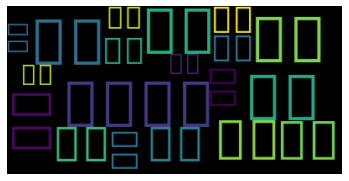

In [297]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(tags_high))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [1]:
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',
    background_color='white'
).generate(' '.join(tags_low))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

In [21]:
import json
import re

from konlpy.tag import Twitter
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

import pytagcloud
import webbrowser

In [394]:
#data_high2.to_csv('C:/Users/32141318/빅콘테스트/SNS데이터/블로그/블로그/SNS1 블로그.csv' ,  encoding="ms949")
data_low2.to_excel('C:/Users/32141318/빅콘테스트/SNS데이터/블로그/블로그/SNS1 블로그 low.xlsx', sheet_name='sheet1')

In [255]:
data_high2.to_csv('C:/Users/32141318/빅콘테스트/SNS데이터/블로그/블로그/sns6 미세먼지 high.csv' , encoding = 'utf8')

In [395]:
from konlpy.tag import Okt  
okt=Okt()
fread = open('C:/Users/32141318/빅콘테스트/SNS데이터/블로그/블로그/SNS1 블로그 low CONTENT만.txt')
# 파일을 다시 처음부터 읽음.
n=0
result = []


while True:
    line = fread.readline() #한 줄씩 읽음.
    if not line: break # 모두 읽으면 while문 종료.
    n=n+1
    if n%5000==0: # 5,000의 배수로 While문이 실행될 때마다 몇 번째 While문 실행인지 출력.
        print("%d번째 While문."%n)
    tokenlist = okt.pos(line, stem=True, norm=True) # 단어 토큰화
    temp=[]
    for word in tokenlist:
        if word[1] in ["Noun"]: # 명사일 때만
            temp.append((word[0])) # 해당 단어를 저장함

    if temp: # 만약 이번에 읽은 데이터에 명사가 존재할 경우에만
      result.append(temp) # 결과에 저장
fread.close()

5000번째 While문.
10000번째 While문.
15000번째 While문.
20000번째 While문.
25000번째 While문.
30000번째 While문.
35000번째 While문.
40000번째 While문.
45000번째 While문.
50000번째 While문.
55000번째 While문.
60000번째 While문.
65000번째 While문.
70000번째 While문.
75000번째 While문.
80000번째 While문.
85000번째 While문.
90000번째 While문.
95000번째 While문.
100000번째 While문.


In [396]:
count_res = []
for i in range(len(temp)):
    
    count = Counter(result[i])
    count_res.append(count)

In [391]:
count_res

[Counter({'룰라': 4,
          '러브': 5,
          '해면': 6,
          '스펀지': 6,
          '얼굴': 4,
          '각질': 4,
          '관리': 3,
          '번': 2,
          '복사': 1,
          '이웃': 1,
          '추가': 1,
          '본문': 1,
          '기타': 1,
          '기능': 1,
          '번역': 1,
          '보기': 1,
          '요즘': 3,
          '때문': 1,
          '화장': 3,
          '안': 1,
          '것': 3,
          '날씨': 1,
          '피지': 1,
          '걱정': 1,
          '이용': 1,
          '세안': 3,
          '수': 2,
          '글': 1,
          '보고': 1,
          '사용': 6,
          '미세먼지': 2,
          '때': 4,
          '쓰기': 2,
          '더': 3,
          '유행': 1,
          '템': 1,
          '그냥': 1,
          '편': 1,
          '물': 2,
          '자극': 1,
          '폼클렌징': 1,
          '거품': 1,
          '매일': 1,
          '느낌': 1,
          '아침': 1,
          '피부': 1,
          '정말': 1,
          '몸': 1,
          '구매': 1,
          '킹': 1,
          '사이즈': 2,
          '면적': 1,
          '충분': 1,

<h2>word2vec를 사용하여서 원하는 단어와 관련성이 높은 단어를 찾기

In [397]:
from gensim.models import Word2Vec
model = Word2Vec(result, size=30, window=5, min_count=5, workers=4, sg=0)

In [407]:
b=model.wv.most_similar("병원")
print(b)

[('직장인', 0.7820209264755249), ('학생', 0.7610174417495728), ('강남', 0.757875919342041), ('식단', 0.7548395395278931), ('요법', 0.7488377094268799), ('남성', 0.7385867238044739), ('수술', 0.734043538570404), ('자가', 0.7323691248893738), ('교정', 0.7264435887336731), ('정기', 0.7224541306495667)]


In [359]:
#전처리
import pandas as pd
data8 = pd.read_csv('C:/Users/32141318/빅콘테스트/SNS데이터/블로그/블로그/SNS1 블로그csv.csv', low_memory=False)
data8.head(2)

,Unnamed: 0,index,DATE,TITLE,CONTENT,month
0,0,6168,2018-04-23 23:59:00,룰라러브 해면스펀지로 얼굴각질과 모공관리를 한 번에,B E A U T Y 룰라러브 해면스펀지로 얼굴각질과 모공관리를 한 번에 El...,4
1,1,6169,2018-04-23 23:59:00,학습만화 어린이백과사전 재미속 정보가득,책 학습만화 어린이백과사전 재미속 정보가득 무지개엄마 2018 4 23 2359 ...,4


In [3]:
#2만개 데이터만 사용
data8 = data8.head(20000)

In [360]:
#tf-idf를 할 때 NaN값이 들어있으면 에러가 나기 때문에 NaN값을 제거했다.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
data_blog2['DOCID'] = data_blog2['DOCID'].fillna('')
data_blog2['SECTION'] = data_blog2['SECTION'].fillna('')
data_blog2['DATE'] = data_blog2['DATE'].fillna('')
data_blog2['TITLE'] = data_blog2['TITLE'].fillna('')
data_blog2['CONTENT'] = data_blog2['CONTENT'].fillna('')

In [361]:
tfidf_matrix = tfidf.fit_transform(data_blog2['CONTENT'])
print(tfidf_matrix.shape)

(5000, 369271)


In [362]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [367]:
indices = pd.Series(data_blog2.index, index=data_blog2['CONTENT']).drop_duplicates()

In [365]:
print(indices.head())

CONTENT
　 　B E A U T Y 룰라러브 해면스펀지로 얼굴각질과 모공관리를 한 번에 Ellie  2018 4 23 2359 URL 복사 이웃추가 본문 기타 기능 번역보기 요즘 얼굴 각질 때문에 화장도 잘 안 먹는 것 같고 날씨가 따뜻해지면서 피지가 많이 올라와서 걱정이었는데 해면 스펀지를 이용해 세안을 하면 모공관리도 한 번에 할 수 있다는 글을 보고 룰라러브 해면스펀지를 사용해봤어요 미세먼지 있을 때 쓰기에도 좋고 그래서 요즘 들어 더 유행하고 있는 세안 템이 더라고요 그냥 만졌을 때는 딱딱한 편인데 물을 촉촉하게 적혀주면 말랑해지면서 자극 없이 얼굴세안을 할 수 있답니다 폼클렌징과 함께 쓰면 거품도 더 잘나고 매일매일 얼굴각질관리 해주는 느낌이라 더 좋더라구요 룰라러브 해면스펀지 사용하면서 아침에 화장할 때 화장도 잘 먹고 피부 들뜸도 없어져서 정말 행복해요 이건 몸에 사용하려고 구매한 킹사이즈 룰라러브 해면스펀지예요 사이즈가 크다 보니 넓은 면적에 쓰기 좋아서 물 충분에 묻힌 다음 바디워시와 함께 사용하면 굿 각질로 신경 쓰이는 복숭아뼈나 발목까지 깨끗하게 해주니까 룰러러브 해면스펀지 더욱 자주 찾게 되는 것 같아요 요즘처럼 미세먼지 많을 때 사용하기도 딱이고 아이 목욕용품으로도 좋다고 하니 한번 사용해보세요                                                                                                                                                                                                                                                                                                                                                                           

In [368]:
idx = indices['미세먼지']
print(idx)

미세먼지    3628
미세먼지    4163
미세먼지    4303
미세먼지    4330
미세먼지    4356
미세먼지    4508
미세먼지    4686
dtype: int64


In [371]:
def get_recommendations(title, cosine_sim = cosine_sim):
    idx = indices[title]
    
    # 모든 글에 대해서 해당 글의 유사도를 구한다.
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # 유사도에 따라 글을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # 가장 유사한 10개의 글을 받아온다.
    sim_scores = sim_scores[1:11]
    
    # 가장 유사한 10개의 글의 인덱스를 받아온다.
    movie_indices = [i[0] for i in sim_scores]
    
    # 가장 유사한 10개의 글 제목을 리턴한다.
    return data8['CONTENT'].iloc[movie_indices]

In [375]:
get_recommendations('미세먼지')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()